# Análise Descritiva - Trabalho Conclusão de Curso - Otto Group Product Classification Challenge

In [48]:
import polars as pl

In [49]:
folder_with_data_to_load = "data/transformed/train/"

In [50]:
transformed_df = pl.read_parquet("data/transformed/train/otto-transformed-train-0.parquet")

# read and merge all data files
for i in range(1, 49):
    file_name = f"otto-transformed-train-{i}.parquet"
    transformed_df = transformed_df.vstack(pl.read_parquet(folder_with_data_to_load + file_name))
    

In [51]:
display(transformed_df.shape[0])
transformed_df.head()

12641755

session,sorted_events,items_clicked,items_carted,items_ordered
i64,list[struct[3]],list[i64],list[i64],list[i64]
0,"[{1517085,1659304800025,""clicks""}, {1563459,1659304904511,""clicks""}, … {161938,1661684983707,""clicks""}]","[1517085, 1563459, … 161938]","[1649869, 461689, … 315914]","[305831, 461689, … 543308]"
1,"[{424964,1659304800025,""carts""}, {1492293,1659304852871,""clicks""}, … {497868,1661714854992,""clicks""}]","[1492293, 910862, … 497868]","[424964, 1492293, … 105393]",[]
2,"[{763743,1659304800038,""clicks""}, {137492,1659304866606,""clicks""}, … {672473,1661714215659,""clicks""}]","[763743, 137492, … 672473]",[161269],[]
3,"[{1425967,1659304800095,""carts""}, {1425967,1659304821062,""clicks""}, … {925352,1661109666771,""carts""}]","[1425967, 1343406, … 925352]","[1425967, 1343406, … 925352]","[357461, 1343406, … 54857]"
4,"[{613619,1659304800119,""clicks""}, {298827,1659304836708,""clicks""}, … {479396,1661586681303,""clicks""}]","[613619, 298827, … 479396]","[1554752, 917213, 758750]",[298827]


In [52]:
transformed_df = transformed_df.with_columns(
    items_clicked_count = transformed_df["items_clicked"].apply(lambda s: len(s)),
    items_carted_count = transformed_df["items_carted"].apply(lambda s: len(s)),
    items_ordered_count = transformed_df["items_ordered"].apply(lambda s: len(s)),
)


Text(0.5, 1.0, 'Items Ordered Distribution')

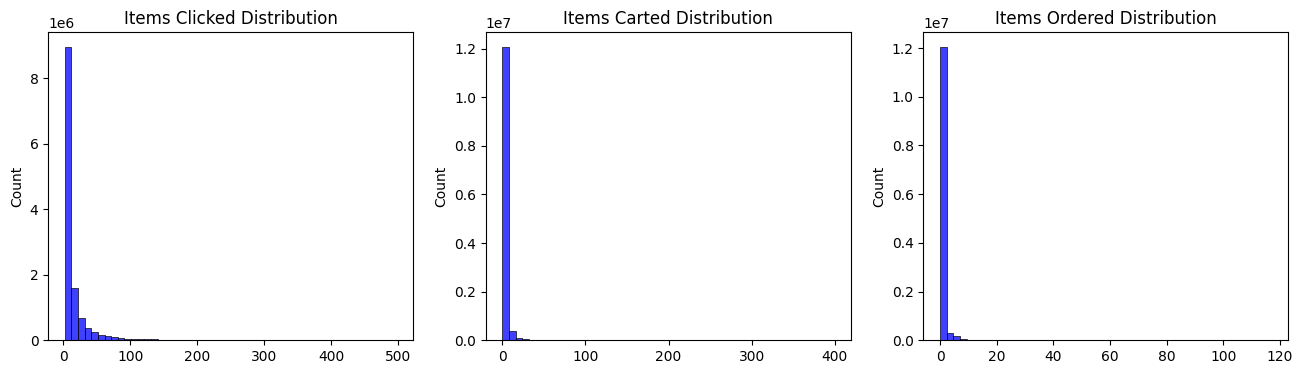

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4))
n_rows = 1 
n_cols = 3 

plt.subplot(n_rows, n_cols, 1)
sns.histplot(transformed_df["items_clicked_count"], color="blue", bins=50)
plt.title(f"{'Items Clicked'} Distribution")

plt.subplot(n_rows, n_cols, 2)
sns.histplot(transformed_df["items_carted_count"], color="blue", bins=50)
plt.title(f"{'Items Carted'} Distribution")

plt.subplot(n_rows, n_cols, 3)
sns.histplot(transformed_df["items_ordered_count"], color="blue", bins=50)
plt.title(f"{'Items Ordered'} Distribution")



### Plotando as Distribuições

In [54]:
transformed_df.head()

session,sorted_events,items_clicked,items_carted,items_ordered,items_clicked_count,items_carted_count,items_ordered_count
i64,list[struct[3]],list[i64],list[i64],list[i64],i64,i64,i64
0,"[{1517085,1659304800025,""clicks""}, {1563459,1659304904511,""clicks""}, … {161938,1661684983707,""clicks""}]","[1517085, 1563459, … 161938]","[1649869, 461689, … 315914]","[305831, 461689, … 543308]",255,17,4
1,"[{424964,1659304800025,""carts""}, {1492293,1659304852871,""clicks""}, … {497868,1661714854992,""clicks""}]","[1492293, 910862, … 497868]","[424964, 1492293, … 105393]",[],24,8,0
2,"[{763743,1659304800038,""clicks""}, {137492,1659304866606,""clicks""}, … {672473,1661714215659,""clicks""}]","[763743, 137492, … 672473]",[161269],[],32,1,0
3,"[{1425967,1659304800095,""carts""}, {1425967,1659304821062,""clicks""}, … {925352,1661109666771,""carts""}]","[1425967, 1343406, … 925352]","[1425967, 1343406, … 925352]","[357461, 1343406, … 54857]",200,21,5
4,"[{613619,1659304800119,""clicks""}, {298827,1659304836708,""clicks""}, … {479396,1661586681303,""clicks""}]","[613619, 298827, … 479396]","[1554752, 917213, 758750]",[298827],15,3,1


In [55]:
from etl.otto_dataset_etl  import OttoDatasetEtl

otto_dataset_etl = OttoDatasetEtl(transformed_df)
otto_dataset_etl.transform(drop_original_events=True)

otto_dataset_etl.dataset.head()

TypeError: DataFrame.apply() got an unexpected keyword argument 'axis'